In [104]:
import cnn_limits.notebook
import imp
imp.reload(cnn_limits.notebook)

from cnn_limits.notebook import ExperimentResults, el, plot_df

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [168]:
el["myrtle10_zca"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_lik_vs_acc/27", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020. Using ZCA and mean-subtraction.
""")
el["myrtle10_zca_v2"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_lik_vs_acc/27", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020.
Using ZCA and per-instance mean-subtraction and unit-normalization.
""")
el["myrtle10_nozca"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_lik_vs_acc/1", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020. Using mean-subtraction.
""")
el["myrtle10_gaussian_zca"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_lik_vs_acc/29", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020. Using ZCA and mean-subtraction.
""")
el["myrtle10_gaussian_zca_v2"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/2", """
Myrtle10-Exp for small data, like in Shankar et al. 2020. Using ZCA (tested to be like them) and mean-subtraction.
""")
el["myrtle10_gaussian_zca_v3"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/3", """
Myrtle10-Exp for small data, like in Shankar et al. 2020. Using ZCA (tested to be like them) and mean-subtraction.
What if regression targets are {-1, 1} ?
""")
el["myrtle10_gaussian_zca_v4"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/4", """
Myrtle10-Exp for small data, like in Shankar et al. 2020. Using ZCA (tested to be like them) and mean-subtraction.
What if regression targets are {0, 1} ?
""")

el["myrtle5_gaussian_zca_shankar_v2"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_cv_acc/17", """
Myrtle5, using *correlation* matrix, Shankar's CheatZCA data set.
""")

el["myrtle5_gaussian_zca_shankar_cov"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_cv_acc/16", """
Myrtle5, using *covariance* matrix, using Shankar's CheatZCA data set.
""")

el["myrtle5_zca_corr"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_cv_acc/5", """
Use ZCA *after* cutting the data set. Use last 10k training examples as test. Correlation matrix.
""")
el["myrtle5_zca_cov"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_cv_acc/6", """
Use ZCA *after* cutting the data set. Use last 10k training examples as test.
""")
    
el["myrtle5_corr"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/7", """
No ZCA. Last 10k train as test. Correlation.""")
el["myrtle5_cov"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/8", """
No ZCA. Last 10k train as test. Correlation.""")

el["myrtle5_zca_wrong_corr"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/9", """
Using ZCA with whole training set. Use last 1k training examples as test. Correlation matrix""")
el["myrtle5_zca_wrong_cov"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/10", """
Using ZCA with whole training set. Use last 1k training examples as test.""")

el["myrtle10_gaussian_nozca_v4"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/5", """
Myrtle10-Exp for small data. No ZCA. Per-instance mean subtraction. Reg. targets {0, 1}
""")

el["cntk5_nngp"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_cv_acc/8", """
CNNGP-5, has mean pooling at the end.
""")
el["cntk5"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_cv_acc/2", """
CNTK-5, mean pooling at the end""")

el["cntk5_nngp_zca"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_cv_acc/10", "")
el["cntk5_zca"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_cv_acc/3", "")

el["cntk5_nngp_truetest"] = ExperimentResults("robbins:/scratch/ag919/logs/predict_cv_acc/6/", "")
el["cntk5_truetest"] = ExperimentResults("sagarmatha:/scratch/ag919/logs/predict_cv_acc/4/", "")

el["myrtle10_cv_zca"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_cv_acc/5", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020. Using ZCA and mean-subtraction.
Using cross-validation to optimize sig_y^2
""")
el["myrtle10_cv_zca_v2"] = ExperimentResults("huygens:/scratch/ag919/logs/predict_cv_acc/5", """
Replicating Myrtle10 for small data, like in Shankar et al. 2020. Using ZCA and mean-subtraction.
Using cross-validation to optimize sig_y^2
""")

In [99]:
baseline_X = [2**i * 10 for i in range(8)]
baseline_myrtle5_Y = np.array([17.22, 22.16, 26.74, 32.56, 38.61, 46.03, 53.45, 60.46]) / 100
baseline_myrtle5_pm = np.array([2.95, 1.69, 1.56, 1.12, 1.06, 0.82, 0.80, 0.58]) / 100
baseline_myrtle10G_Y = np.array([19.15, 21.65, 27.20, 34.22, 41.89, 50.06, 57.60, 64.40]) / 100
baseline_myrtle10G_pm = np.array([1.94, 2.97, 1.90, 1.08, 1.34, 1.06, 0.48, 0.48]) / 100

cntk5 = np.array([15.08, 18.03, 20.83, 24.82, 29.63, 35.26, 41.24, 47.21]) / 100
cntk5_error = np.array([2.43, 1.91, 1.68, 1.75, 1.13, 0.97, 0.78, 0.49]) / 100

cntk14 = np.array([15.33, 18.79, 21.34, 25.48, 30.48, 36.57, 42.63, 48.86]) / 100
cntk14_error = np.array([2.43, 2.13, 1.91, 1.91, 1.17, 0.88, 0.68, 0.68]) / 100


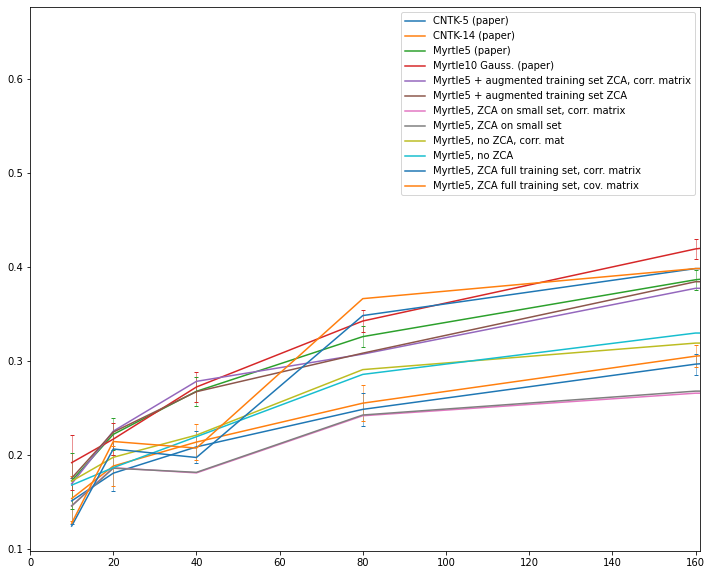

In [177]:
data = el["myrtle10_zca"].read_pickle("grid_lik_acc.pkl.gz")
df = data.applymap(lambda x: x[2].max())

lab1 = "points"
lab2 = "layer"

fig, axes = plt.subplots(1, 1, figsize=(12, 10))
ax = axes

# Baseline


color = ax.errorbar(baseline_X, cntk5, yerr=cntk5_error, elinewidth=0.5,
                    capsize=2., linestyle='').lines[0].get_color()
ax.plot(baseline_X, cntk5, color=color, label="CNTK-5 (paper)")

color = ax.errorbar(baseline_X, cntk14, yerr=cntk14_error, elinewidth=0.5,
            capsize=2., linestyle='').lines[0].get_color()
ax.plot(baseline_X, cntk14, color=color, label="CNTK-14 (paper)")

df = pd.DataFrame(index=baseline_X)
df["Myrtle5 (paper)"] = baseline_myrtle5_Y

color = ax.errorbar(baseline_X, baseline_myrtle5_Y, yerr=baseline_myrtle5_pm, elinewidth=0.5,
            capsize=2., linestyle='').lines[0].get_color()
ax.plot(baseline_X, baseline_myrtle5_Y, color=color, label="Myrtle5 (paper)")
color = ax.errorbar(baseline_X, baseline_myrtle10G_Y, yerr=baseline_myrtle5_pm, elinewidth=0.5,
            capsize=2., linestyle='').lines[0].get_color()
ax.plot(baseline_X, baseline_myrtle10G_Y, color=color, label="Myrtle10 Gauss. (paper)")


def f(key, name=None):
    if name is None:
        name = key
    series = el[key].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
    df[name] = series
    ax.plot(series.index, series.values, label=name)
    
f("myrtle5_gaussian_zca_shankar_v2", "Myrtle5 + augmented training set ZCA, corr. matrix")
f("myrtle5_gaussian_zca_shankar_cov", "Myrtle5 + augmented training set ZCA")
f("myrtle5_zca_corr", "Myrtle5, ZCA on small set, corr. matrix")
f("myrtle5_zca_cov", "Myrtle5, ZCA on small set")
f("myrtle5_corr", "Myrtle5, no ZCA, corr. mat")
f("myrtle5_cov", "Myrtle5, no ZCA")
f("myrtle5_zca_wrong_corr", "Myrtle5, ZCA full training set, corr. matrix")
f("myrtle5_zca_wrong_cov", "Myrtle5, ZCA full training set, cov. matrix")

ax.set_xlim((0, 161))
ax.legend()


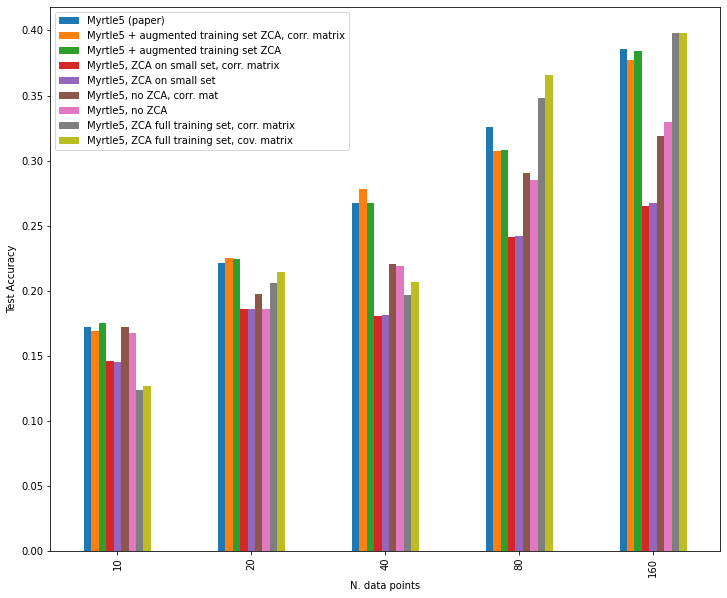

In [176]:
_, ax = plt.subplots(1, 1, figsize=(12, 10))
df.loc[:160].plot(kind='bar', ax=ax)
ax.set_xlabel("N. data points")
ax.set_ylabel("Test Accuracy")

plt.savefig("/tmp/index.png")

In [155]:
a.lines[0].get_color()

'C1'

(0.12, 0.45)

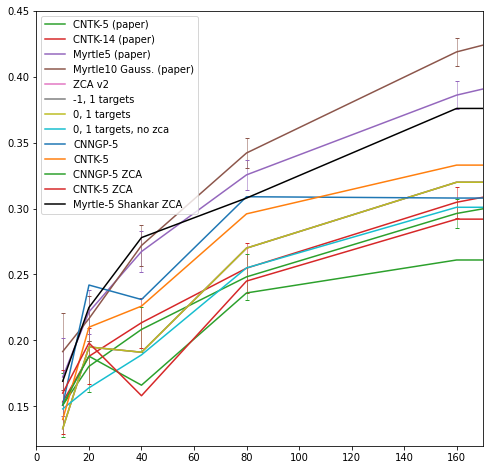

In [130]:
data = el["myrtle10_zca"].read_pickle("grid_lik_acc.pkl.gz")
df = data.applymap(lambda x: x[2].max())

lab1 = "points"
lab2 = "layer"

fig, axes = plt.subplots(1, 1, figsize=(8, 8))
ax = axes

# Baseline


ax.errorbar(baseline_X, cntk5, yerr=cntk5_error, elinewidth=0.5,
            capsize=2., linestyle='', color="C2")
ax.plot(baseline_X, cntk5, color="C2", label="CNTK-5 (paper)")

ax.errorbar(baseline_X, cntk14, yerr=cntk14_error, elinewidth=0.5,
            capsize=2., linestyle='', color="C3")
ax.plot(baseline_X, cntk14, color="C3", label="CNTK-14 (paper)")

ax.errorbar(baseline_X, baseline_myrtle5_Y, yerr=baseline_myrtle5_pm, elinewidth=0.5,
            capsize=2., linestyle='', color="C4")
ax.plot(baseline_X, baseline_myrtle5_Y, color="C4", label="Myrtle5 (paper)")
ax.errorbar(baseline_X, baseline_myrtle10G_Y, yerr=baseline_myrtle5_pm, elinewidth=0.5,
            capsize=2., linestyle='', color="C5")
ax.plot(baseline_X, baseline_myrtle10G_Y, color="C5", label="Myrtle10 Gauss. (paper)")

series = el["myrtle10_gaussian_zca_v2"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, color="C6", label="ZCA v2")

series = el["myrtle10_gaussian_zca_v3"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, color="C7", label="-1, 1 targets")

series = el["myrtle10_gaussian_zca_v4"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, color="C8", label="0, 1 targets")

series = el["myrtle10_gaussian_nozca_v4"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, color="C9", label="0, 1 targets, no zca")

series = el["cntk5_nngp"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, label="CNNGP-5")

series = el["cntk5"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, label="CNTK-5")

series = el["cntk5_nngp_zca"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, label="CNNGP-5 ZCA")

series = el["cntk5_zca"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, label="CNTK-5 ZCA")

series = el["myrtle5_gaussian_zca_shankar"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]
ax.plot(series.index, series.values, label="Myrtle-5 Shankar ZCA", color="black")



#plot_df(ax, df, lab2)
#ax.set_xlabel(f"N. {lab1}")
#ax = axes[1]
#plot_df(ax, df.T, lab1)
#ax.set_xlabel(f"N. {lab2}")
ax.legend()
ax.set_xlim((0, 170))
ax.set_ylim((0.12, 0.45))

#plot_df(ax, df, lab2)
#ax.set_xlabel(f"N. {lab1}")
#ax = axes[1]
#plot_df(ax, df.T, lab1)
#ax.set_xlabel(f"N. {lab2}")
ax.legend()
ax.set_xlim((0, 170))
ax.set_ylim((0.12, 0.45))

In [132]:
df = pd.DataFrame(index=baseline_X)

df["CNTK-5 (paper)"] = cntk5
df["CNTK-14 (paper)"] = cntk14
df["Myrtle5 (paper)"] = baseline_myrtle5_Y
df["Myrtle10 Exp. (paper)"] = baseline_myrtle10G_Y



for k, v in [
    ("myrtle10_gaussian_zca_v2", "ZCA v2"),
    ("myrtle10_gaussian_zca_v3", "-1, 1 targets"),
    ("myrtle10_gaussian_zca_v4", "0, 1 targets"),
    ("myrtle10_gaussian_nozca_v4", "0, 1 targets, no ZCA"),
    
    ("cntk5", "CNTK-5"),
    ("cntk5_zca", "CNTK-5 ZCA"),
    
    ("cntk5_nngp", "CNNGP-5"),
    ("cntk5_nngp_zca", "CNNGP-5 ZCA"),
    
    ("cntk5_nngp_truetest", "CNNGP-5 True Test"),
    ("cntk5_truetest", "CNNTK-5 True Test"),
]:
    df[v] = el[k].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0]).loc[0, :]

df

,CNTK-5 (paper),CNTK-14 (paper),Myrtle5 (paper),Myrtle10 Exp. (paper),ZCA v2,"-1, 1 targets","0, 1 targets","0, 1 targets, no ZCA",CNTK-5,CNTK-5 ZCA,CNNGP-5,CNNGP-5 ZCA,CNNGP-5 True Test,CNNTK-5 True Test
10,0.1508,0.1533,0.1722,0.1915,0.133,0.133,0.133,0.148,0.140,0.160,0.151,0.151,0.1542,0.1586
20,0.1803,0.1879,0.2216,0.2165,0.195,0.195,0.195,0.164,0.210,0.198,0.242,0.188,0.2162,0.1887
40,0.2083,0.2134,0.2674,0.2720,0.191,0.191,0.191,0.189,0.226,0.158,0.231,0.166,0.2302,0.2163
80,0.2482,0.2548,0.3256,0.3422,0.270,0.270,0.270,0.255,0.296,0.245,0.309,0.236,0.2901,0.2858
160,0.2963,0.3048,0.3861,0.4189,0.320,0.320,0.320,0.301,0.333,0.292,0.308,0.261,0.3170,0.3257
320,0.3526,0.3657,0.4603,0.5006,0.320,0.320,0.320,0.301,0.333,0.292,0.308,0.261,0.3170,0.3257
640,0.4124,0.4263,0.5345,0.5760,0.320,0.320,0.320,0.301,0.333,0.292,0.308,0.261,0.3170,0.3257
1280,0.4721,0.4886,0.6046,0.6440,0.320,0.320,0.320,0.301,0.333,0.292,0.308,0.261,0.3170,0.3257


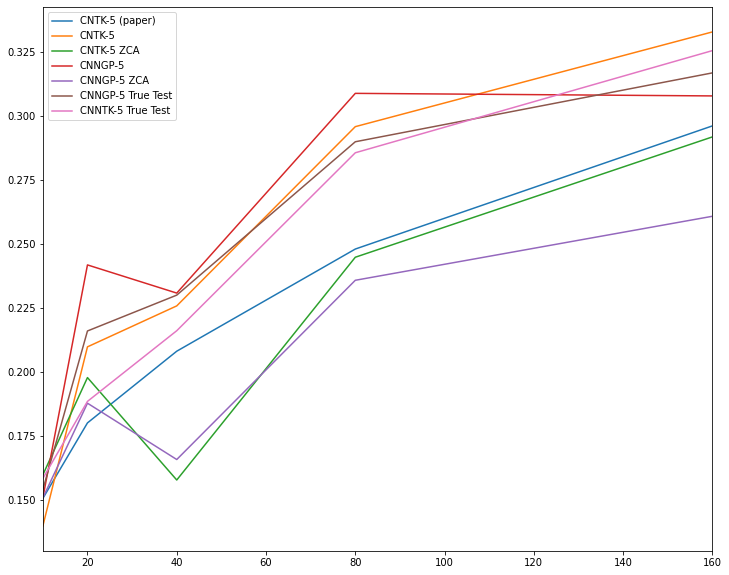

In [133]:
_, ax = plt.subplots(1, 1, figsize=(12, 10))
df.loc[:160, ["CNTK-5 (paper)", "CNTK-5", "CNTK-5 ZCA", "CNNGP-5",
              "CNNGP-5 ZCA", "CNNGP-5 True Test", "CNNTK-5 True Test"]].plot(ax=ax)

10      0.133
20      0.195
40      0.191
80      0.270
160     0.320
320     0.320
640     0.320
1280    0.320
Name: 0, dtype: float64

In [58]:

el["myrtle10_gaussian_zca_v2"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0])

,10,20,40,80,160,320,640,1280
0,0.133,0.195,0.191,0.27,0.32,0.32,0.32,0.32


In [54]:
el["myrtle10_cv_zca_v2"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[0][0])

,10,20,40,80,160,320,640,1280
0,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
1,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
2,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
3,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
4,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
5,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
6,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
7,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
8,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159
9,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159,148.413159


In [55]:
el["myrtle10_cv_zca_v2"].read_pickle("accuracy.pkl.gz").dropna().applymap(lambda a: a[1][0])

,10,20,40,80,160,320,640,1280
0,0.1003,0.1470,0.0969,0.1110,0.1000,0.1000,0.1008,0.1179
1,0.1220,0.1397,0.1796,0.2201,0.2263,0.2748,0.3000,0.3071
2,0.1195,0.1286,0.1310,0.1408,0.1581,0.1718,0.2039,0.2362
3,0.1000,0.1313,0.1000,0.1205,0.1000,0.1000,0.1000,0.1097
4,0.1190,0.1336,0.1800,0.2156,0.2256,0.2657,0.2953,0.3024
5,0.1182,0.1438,0.1404,0.1586,0.1797,0.2018,0.2340,0.2500
6,0.1000,0.1022,0.1000,0.1016,0.1000,0.1000,0.1002,0.1083
7,0.1162,0.1320,0.1794,0.2037,0.2184,0.2602,0.2895,0.2989
8,0.1158,0.1496,0.1436,0.1693,0.1902,0.2123,0.2307,0.2568
9,0.1000,0.1000,0.1000,0.1051,0.1233,0.1224,0.1413,0.1092


In [51]:
el["myrtle10_gaussian_zca"].read_pickle("grid_lik_acc.pkl.gz").dropna().applymap(lambda x: x[0][x[2].argmax()])

,10,20,40,80,160,320,640,1280
44,0.000114,0.00059,0.001138,9.779208e-07,0.000011,0.000038,0.000002,2.319523e-16


In [52]:
el["myrtle10_gaussian_zca"].read_pickle("grid_lik_acc.pkl.gz").dropna().applymap(lambda x: x[2].max())

,10,20,40,80,160,320,640,1280
43,0.1528,0.1580,0.1676,0.2123,0.2422,0.2744,0.3028,0.3597
44,0.1529,0.1581,0.1674,0.2126,0.2418,0.2746,0.3028,0.3594


In [105]:
df = pd.DataFrame(columns=["CNTK", "Helo"], index=[10, 20, 40])

In [109]:
df.values[...] = np.random.randn(*df.values.shape)

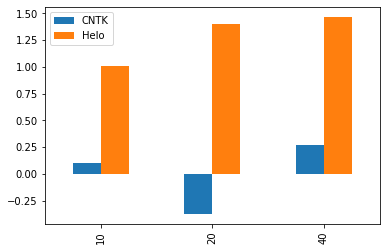

In [115]:
df.plot(kind='bar')

In [ ]:
|